# Physics 113: Problem Set 1
## Submit notebook to Canvas by April 23, 2023 17:00 PDT

## Question 1: Manipulating and plotting data (2 points)

Today, you'll warm up your `numpy`, `scipy`, and `matplotlib` skills by plotting a histogram of quantum physics papers posted to the arXiv (labelled as 'quant-ph') since mid-1995. The data you'll use is stored in the file `arxiv.csv`, which has been cleaned from a publicly available dataset posted by Kaggle user LOULOU.

In [1]:
import numpy as np

# Load the data, with columns containing year, month, and day
data = np.genfromtxt('arxiv.csv', delimiter=',', dtype=np.float64)
print(data.shape)

(72881, 3)


This array contains 72,881 rows, each corresponding to a single paper, with columns for year, month, and day. Next, use `numpy` array indexing to convert each year/month pair to a single number representing time:

\begin{align*}
    \mathrm{time}\ =\ \mathrm{year}\ +\ \frac{\mathrm{month}}{12}
\end{align*}
\
Store these values in an array `times`, which should have shape `(72881,)`. Because we'll be creating a histogram with a bin width of several months, we won't use the third column (days).

In [2]:
# Convert the year, month colums to a single numerical value

times = data[:,0] + data[:,1] / 12 # (<-- your array goes here)

print(times.shape)

(72881,)


The data are very sparse before mid-1995. Let's use array indexing again to keep only the values in `times` that are greater than 1995.5.

---
**Tip:**
If we have an array `a`, then `(a >= 7)` is an array with the same length as `a`, with elements `True` (where the corresponding value in `a` was greater than or equal to 7) or `False` (the value in `a` was less than 7). We can then index `a` using this boolean array, and we'll get back an array which contains just the elements of `a` which are greater than or equal to 7. This method of indexing is extremely helpful when cleaning data.

In [3]:
# Extract the elements of <times> which are greater than 1995.5
# Store the result in <times>, i.e. redefine the array

times = times[times > 1995.5] # (<-- your array goes here)

## Calculating the histogram
Finally, you'll visualize the data using `matplotlib` and add some interpolations. First, create an array containing the edges of the bins for the histogram, running from `min(times)` to `max(times)`, with a bin width of 1/3 (i.e. 4 months). Next, use the array you just created to calculate the centers of the bins; remember that if there are $n$ bin edges, then there are $n-1$ bin centers. You'll use these centers for plotting the histogram and calculating interpolations.

The last piece of data you'll need is the set of counts in the bins. For this, you can use `np.histogram`, which takes the data to be binned (in our case, `times`) and the bin edges (using the keyword `bins`).

---
(If you prefer, feel free to use `plt.hist` instead, being sure to store the output array which gives the counts in each bin &mdash; you'll need these values for interpolation later.)

---
`np.histogram` returns a tuple of two arrays, the first containing the counts in each bin and the second containing the bin edges. Because you don't need to store the edges again, you can ignore the second output using an underscore: `counts, _ = np.histogram(...)`.

In [4]:
# Create an array of bin edges
bin_edges = np.arange(times.min(), times.max() + 1/3, 1/3)

# Use the bin edges to create an array with the bin centers
# Note that the array of centers will be 1 element shorter than the edges array
bin_centers = bin_edges[:-1] + 1/6

# Use np.histogram to compute the bin counts
counts, _ = np.histogram(times, bins=bin_edges)

In [5]:
counts.shape

(74,)

## Plotting the histogram
Your last task is visualizing the data you've computed. If you used `np.hist` above (rather than `plt.hist`), you can plot the histogram itself using `plt.step`, with the bin centers as your $x$ values and the counts as your $y$ values. The function `plt.step` takes a keyword `where`, which in this case can be set to `'mid'` to make the steps occur halfway between adjacent bin center values.

---

(If you want to, you can try shading the area under the histogram using `plt.fill_between`, which takes a similar keyword `step='mid'` to shade the area as a step function rather than a curve.)

Text(0.5, 1.0, 'Numbers of quant-ph papers on arXiv')

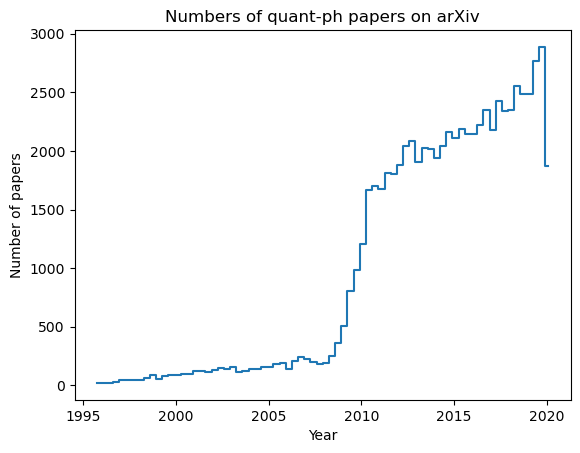

In [6]:
from matplotlib import pyplot as plt
plt.step(bin_centers, counts, where='mid')
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Numbers of quant-ph papers on arXiv')

## The interpolations
Finally (for real this time), you'll plot the following three interpolations over the histogram, using your `bin_centers` and `counts` as your $x$ and $y$ values. `scipy.interp1d` and `scipy.CubicSpline` make interpolating easy; see our [tutorial](https://yipihey.github.io/Physics-113-Book/python_basics/basic-plotting.html#interpolation) on interpolation for an example very similar to this.

Here are the interpolations to plot:

1) quadratic, interpolating between every 2$^{\mathrm{nd}}$ point
2) quadratic, interpolating between every 5$^{\mathrm{th}}$ point
3) cubic spline, interpolating between every 4$^{\mathrm{th}}$ point

---

**Some tips:**

- To grab every $n^{\mathrm{th}}$ point from an array, `numpy` indexing comes in handy again. For an array `a`, indexing with `x[start:stop:step]` returns the elements from indices `start` to `stop` (as usual, not including the upper endpoint), taking only every `step`$^{\mathrm{th}}$ element.

- If `scipy` protests because you've tried to plot a curve beyond the bounds of the data you used to create the interpolation, the keyword `fill_value='extrapolate'` will tell the interpolation to predict values outside the original domain. If any of your curves do end up extending beyond the ends of the histogram, note whether they look like they're doing a realistic job of extrapolating.

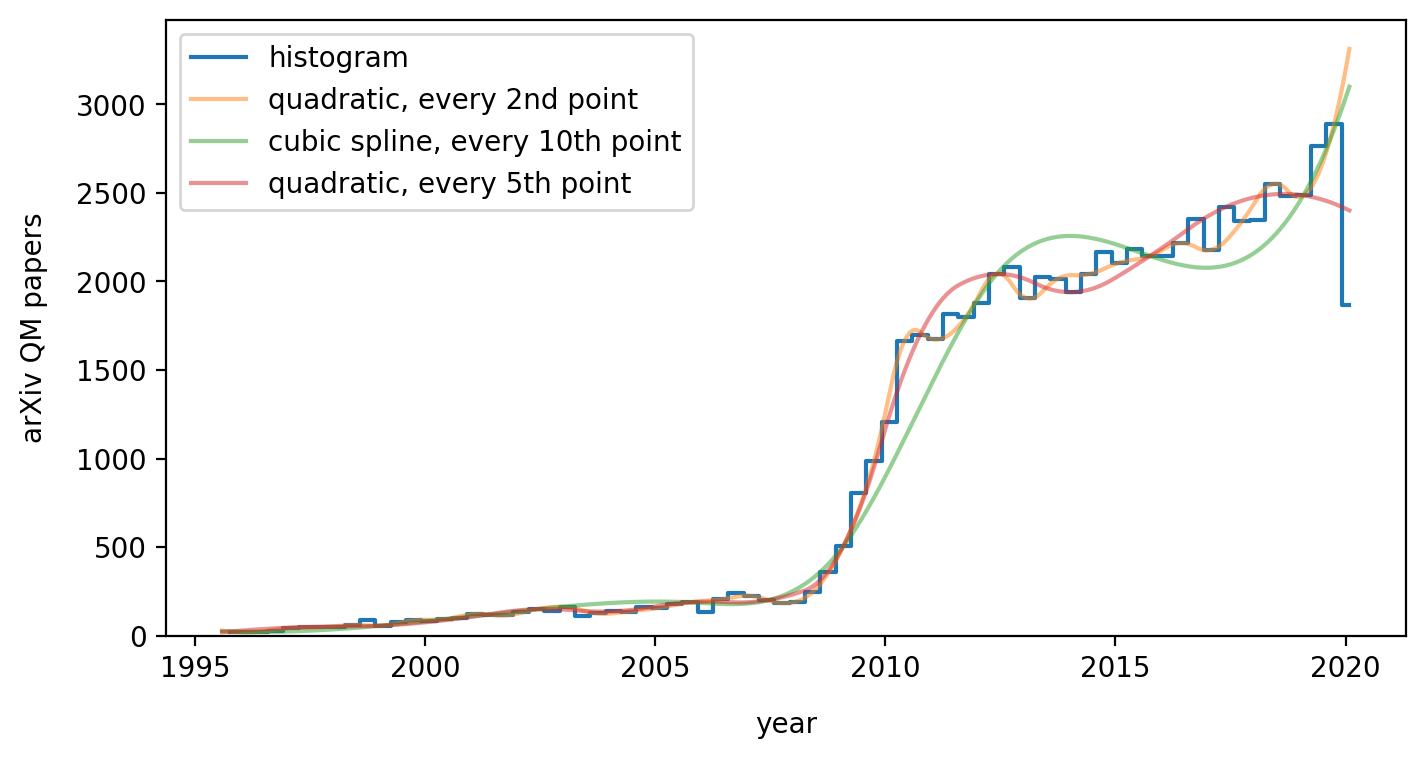

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# Quadratic interpolation of every 2nd data point:
quad_2 = interp1d(bin_centers[::2], counts[::2], kind='quadratic', fill_value="extrapolate")

# Cubic spline interpolation of every 10th data point:
cubic_spline = CubicSpline(bin_centers[::10], counts[::10], extrapolate=True)

# Quadratic interpolation of every 5th data point:
quad_5 = interp1d(bin_centers[::5], counts[::5], kind='quadratic', fill_value="extrapolate")

# Create a dense set of x values for plotting the interpolations
xnew = np.linspace(min(times), max(times), 1000, endpoint=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)

# Plot the histogram and the interpolations
ax.step(bin_centers, counts, where='mid', label='histogram')

ax.plot(xnew, quad_2(xnew), label='quadratic, every 2nd point', alpha=0.5)
ax.plot(xnew, cubic_spline(xnew), label='cubic spline, every 10th point', alpha=0.5)
ax.plot(xnew, quad_5(xnew), label='quadratic, every 5th point', alpha=0.5)

ax.set_xlabel('year', labelpad=10)
ax.set_ylabel('arXiv QM papers', labelpad=10)
ax.set_ylim([0, None])
ax.legend()
plt.show()

**Assessing the interpolations:**

Looking at the curves, which of the interpolations, if any, might be overfitting the histogram?

Which interpolation do you think would do the best job of predicting the numbers of quant-ph papers submitted over the next few years beyond the end of the plot?

---

I feel like the quadratic interpolation with every 2nd point is overfitting the histogram. If the pandemic didn't exist, I think the cubic spline would do the best at extrapolation; keeping the pandemic in mind, the quadratic interpolation every 5th point seems to do the best.

---
# Question 2: Integrals to $\infty$ (2 points)


In the problems we've encountered so far, we've used our numerical integration techniques over finite domains $x\in[a,b]$. What if we want to evaluate an integral whose domain is *infinite*? Is numerical integration even useful here?

Let's look at one of the classics: the integral of a Gaussian over the real line. This is an integral that we can do analytically, of course, but calculating it numerically will give us some insight into how we'd deal with more complicated versions that aren't as easily solved on paper.

\begin{align*}
    I=\int_{-\infty}^{\infty} e^{-x^2}\, dx
\end{align*}

If we approach this integral head-on with trapezoids or Simpson's approximation, things won't go well &mdash; we'd be asking the computer to use an infinite number of intervals (or infinitely wide intervals, if we specify a finite number of them).

---

To make things numerically tractable, let's change variables so that the limits of the integral become finite. There are many different ways to choose a new variable $z$ such that $x$ approaches positive and negative infinity as $z$ approaches two different finite values. For this purpose, it's often helpful to use a denominator such as $(1-z)$ or $(1-z^2)$ so that $x$ diverges as $z$ approaches finite values like $1$ or $-1$. As an example, we'll use

\begin{align*}
    x \equiv \frac{z}{1-z^2}\quad\implies\quad dx=\frac{1+z^2}{(1-z^2)^2}\, dz\ ,
\end{align*}

so that $x\rightarrow\pm\infty$ corresponds to $z\rightarrow\pm1$. The original integral then becomes

\begin{align*}
    I = \int_{-1}^{1} \frac{1+z^2}{(1-z^2)^2}\,\exp\left[-\,\frac{z^2}{(1-z^2)^2}\right]\, dz\ .
\end{align*}
\
We've sacrificed some elegance in our expression for $I$, but on the plus side, numerical integration works best when it doesn't require infinite computational resources. We now have a problem that we can handle using the techniques we've learned for definite integrals.

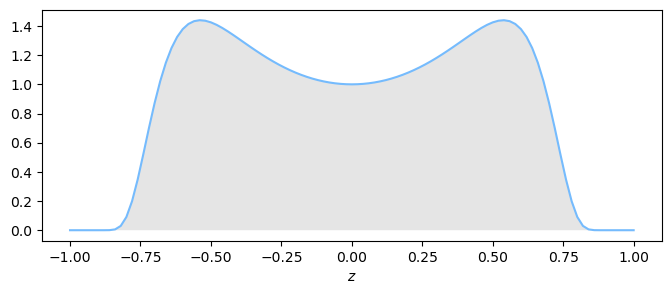

In [8]:
# Visualize the integral in its new form

def integrand(z):
    """
        Computes the function value of the integrand above.
        
        Inputs:
        z: integration variable
        
        Output:
        Integrand value at z
    """
    
    # Calculate the function value in two parts and multiply
    factor_a = (1 + z ** 2) / (1 - z ** 2) ** 2
    factor_b = np.exp(- z ** 2 / (1 - z ** 2) ** 2)
    
    return factor_a * factor_b


# Use a small epsilon to avoid divide-by-zero at lower/upper bounds
epsilon = 1e-6

# Set number of points to plot
n_points = 101

lower_bound = -1 + epsilon
upper_bound = 1 - epsilon

x_vals = np.linspace(lower_bound, upper_bound, n_points)
y_vals = integrand(x_vals)

# Plot integrand
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(x_vals, y_vals, color='xkcd:sky blue')
ax.fill_between(x_vals, y_vals, facecolor=(0,0,0,0.1), zorder=-1)
ax.set_xlabel('$z$')
plt.show()

In [9]:
# Compute the integral using np.trapz and the plotted x,y values
integral = np.trapz(y_vals, x_vals)
true_val = np.sqrt(np.pi)

print(f'Trapezoidal approximation, {n_points - 1} intervals:\n{integral}\n')
print(f'True value (square root of pi):\n{true_val}\n')

# Calculate error relative to true value I = sqrt(pi)
print(f'Relative error: {np.abs(integral - true_val) / true_val:.3e}')

Trapezoidal approximation, 100 intervals:
1.7724538508774184

True value (square root of pi):
1.7724538509055159

Relative error: 1.585e-11


---
Using the trapezoidal approximation on our transformed integral, we get a very accurate estimate of the true value, which is

\begin{align*}
    \int_{-\infty}^{\infty}e^{-x^2}\,dx=\sqrt{\pi}\ .
\end{align*}

Because this integral was symmetric, we could have also just calculated the half from zero to infinity, then doubled that result. In that case, where the integral starts at zero, can you think of an even simpler change of variable that would make the upper limit finite, instead of positive infinity? This might come in handy below!

---

## Try it out:
Apply the strategy we saw above to the following integral, which is used in deriving the Stefan-Boltzmann constant:

\begin{align*}
    I=\int_0^{\infty}\frac{x^3}{e^x-1}\, dx
\end{align*}
    
1) Find a new change of variable (**not** the one used in the example above!) which transforms this integral into one with finite bounds. Write your new integrand as a Python function and plot it over the relevant domain (as in the example above).
2) Choose one of the numerical integration techniques we've learned and use it to calculate the value of this integral (feel free to use `numpy` or `scipy` functions for this). Calculate the error in your result relative to the true value, which is $I=\frac{\pi^4}{15}$.

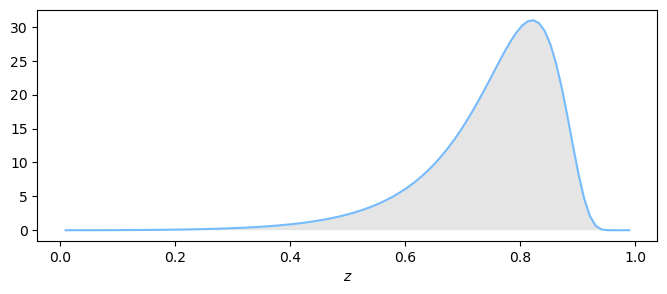

In [10]:
def new_integrand(z): # z = x / (1 + x)
    """
        Computes the function value of your transformed integrand.
        
        Inputs:
        z: integration variable
        
        Output:
        Integrand value at z
    """
    
    x = z / (1 - z)

    return x**3 / (np.exp(x) - 1) / (1 - z)**2


# Set number of points to plot
n_points = 101

# If needed, use epsilon to avoid divide-by-zero at lower/upper bounds
epsilon = 1e-2

lower_bound = 0 + epsilon
upper_bound = 1 - epsilon

x_vals = np.linspace(lower_bound , upper_bound, n_points)
y_vals = new_integrand(x_vals)

# Plot your new integrand
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(x_vals, y_vals, color='xkcd:sky blue')
ax.fill_between(x_vals, y_vals, facecolor=(0,0,0,0.1), zorder=-1)
ax.set_xlabel('$z$')
plt.show()

Now compute the integral numerically using a method of your choice (`numpy` and `scipy` methods are fine).

In [11]:
# Compute the integral using your chosen approximation and the plotted x,y values

from scipy.integrate import simpson

integral = simpson(y_vals, x_vals)

true_val = np.pi ** 4 / 15

print(f'My approximation, {n_points - 1} intervals:\n{integral}\n')
print(f'True value (pi^4 / 15):\n{true_val}\n')

# Calculate error relative to true value I = pi^4 / 15
print(f'Relative error: {np.abs(integral - true_val) / true_val:.3e}')

My approximation, 100 intervals:
6.4939383685453596

True value (pi^4 / 15):
6.493939402266828

Relative error: 1.592e-07


---
# Question 3: High-dimensional Monte Carlo integration (2 points)

Here's a high-dimensional integral that's used in statistical mechanics (for calculating the correlation function between pairs of spins in the [classical XY lattice model](https://en.wikipedia.org/wiki/Classical_XY_model)):

\begin{align*}
    I=\int_0^{2\pi}\hspace{-2mm}\dots\int_0^{2\pi}\cos(\theta_n-\theta_0)\cos(\theta_0-\theta_1)\cos(\theta_1-\theta_2)\dots\cos(\theta_{n-1}-\theta_n)\ \  d\theta_0\dots d\theta_n
\end{align*}
\
You're going to write a function that uses Monte Carlo integration to estimate the value of this integral for an arbitrary number of dimensions $n$. We've already provided a function `cos_integrand` that calculates the value of the integrand, given an array of specific values $[\theta_0,\dots,\theta_n]$ corresponding to a point in this $n$-dimensional $\theta$ space.

In [21]:
def cos_integrand(thetas):
    """
        Computes the function value of the integrand above.
        
        Inputs:
        thetas: an array [theta_0, ..., theta_n] specifying a point in theta space
        
        Output:
        Integrand value at the point specified by <thetas>
    """
    
    # Use np.take to shift array to the right (last theta wraps around to front)
    # Subtract <thetas> from this to get an array of differences (theta_i - theta_{i+1})
    diffs = thetas.take(indices=range(-1, thetas.shape[1]-1), axis = 1, mode='wrap') - thetas
    
    return np.prod(np.cos(diffs), axis = 1)

Now write your own `mc_thetas` function which draws random points uniformly from the integration volume to estimate the value of the integral for an arbitrary number of dimensions and MC sample points.

In [22]:
def mc_thetas(func, dim, num_pts): # cos_integrand has been modified to accept vectorized input
    """
        Calculates the integral above using uniform MC sampling.
        
        Inputs:
        func: the function to be integrated
        dim: the number of dimensions of the integral
        num_pts: the number of sample points used in the MC
        
        Output:
        MC estimate of the integral in <dim> dimensions
    """
    
    x = np.random.uniform(low=0, high=2*np.pi, size=(num_pts, dim))
    
    return np.mean(func(x)) * (2*np.pi)**dim

Finally, run the cells below to calculate your MC estimate for $n=2,4,6,\dots,32$ and plot the absolute relative error using the true value of the integral, which is $I=2\pi^n$. If you don't see any trend in the plot of errors, try increasing the number of sample points until a pattern becomes apparent.

In [24]:
# Set a range of dimensions for which to compute the integral
dims = np.arange(2, 32, step=2)

# Adjust the number of sample points for a reasonable runtime
num_pts = int(1e6)

# Compute the integral for each dimension in <dims>
mc_outputs = np.array([mc_thetas(cos_integrand, n, num_pts) for n in dims])

# Compute the true integral values, given by 2*pi^n
truths = np.array([2 * np.pi ** n for n in dims])

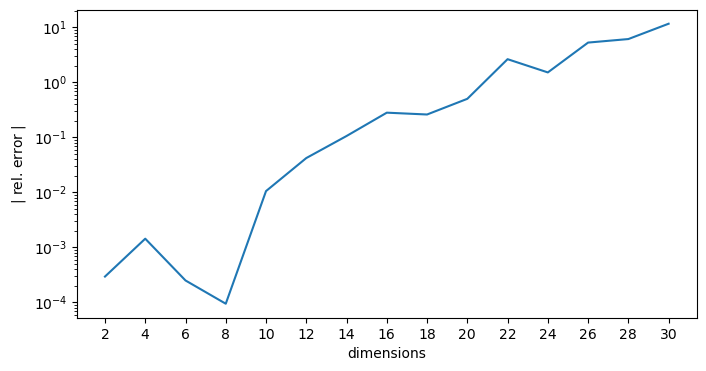

In [25]:
# Plot the relative errors of the MC results

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(dims, np.abs(mc_outputs - truths) / truths)
ax.set_yscale('log')
ax.set_xlabel('dimensions')
ax.set_ylabel('$|\ $rel. error$\ |$')
ax.set_xticks(dims)
plt.show()

**Assessing the errors:**

What do you notice about the error as the number of dimensions increases? In one sentence, suggest a change you could make to the sampling process that might keep the relative error more consistent as the number of dimensions changes.

---

The relative error grows roughly exponentially as the number of dimensions increases. We could implement some form of importance sampling to our sampling process.

# Question 4: Image data (2 points)

In class, we explored various techniques for computing integrals which may have no analytic solution. But since we used well-defined functions, this was possibly something you already knew how to do numerically with WolframAlpha/Mathematica. Today, we'll explore how to use Python and Monte Carlo techniques to find the area of an *unknown* shape.

Consider the jagged shape that I've drawn below. I can't think of an obvious set of equations to describe it. How could we find the area under this curve?
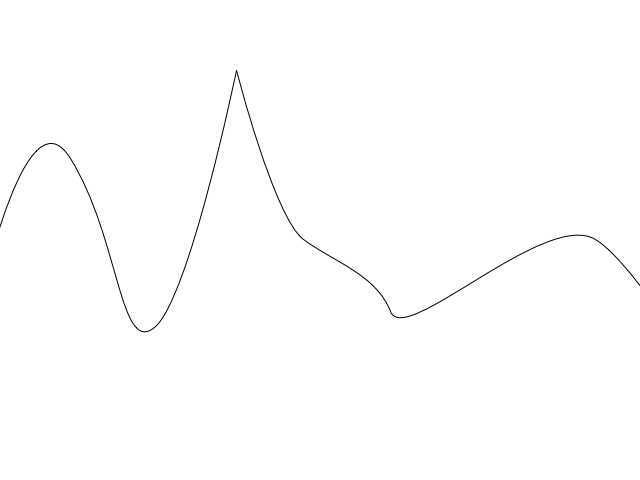

To open this image in Python, we'll use the library `openCV`. You'll likely have to install this package by running the following cell:

In [26]:
# import sys
# !{sys.executable} -m pip install opencv-python

If this doesn't work, check the documentation for alternative methods [here](https://docs.opencv.org/4.x/da/df6/tutorial_py_table_of_contents_setup.html). `openCV` is a very powerful library for image processing and manipulation. Today, however, we'll just use it to convert this image to a `numpy` array.

Let's begin by importing `openCV` and a few other useful packages:

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

We can now open this image with `openCV`:

In [28]:
img = cv2.imread('Shape1.png')

Let's take a look at what this variable looks like:

In [29]:
print(img.shape)

(480, 640, 3)


We see that the first two dimensions are 480 and 640. This makes sense because the image is 480 pixels by 640 pixels. But what about the third dimension of size 3? This is because pixels are stored using three numbers. Usually, they describe RGB values. Each number is an 8-bit integer running from 0 to 255. The first number describes how much red is in the pixel's color (0 if none, 255 if a lot), the second number describes how much green, and the last describes how much blue.

If the pixel were white, for example, this color would be described by a pixel with value (255, 255, 255) because this is a combination of each color in equal parts. If it were black, it would be (0, 0, 0), because computers identify black as the absense of color.

Let's take a look at one corner of this image:

In [30]:
print(img[0, 0, :])

[255 255 255]


We see that this is (255, 255, 255), describing white, just as we expected!

In this example, however, the image is black and white, so we could instead identify each pixel as a grayscale slider for simplicity. Let's instead import the image with an extra argument to signal this to `openCV`:

In [31]:
img = cv2.imread('Shape1.png', cv2.IMREAD_GRAYSCALE)

Now the image has a simpler shape:

In [32]:
print(img.shape)

(480, 640)


Where each value runs from 0 for black to 255 for white. Let's verify this for one column of the image:

In [33]:
print(img[:, 0])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 230 145  58  19  99 186 252 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

To check that everything has imported correctly, we can try opening this directly in `matplotlib`:

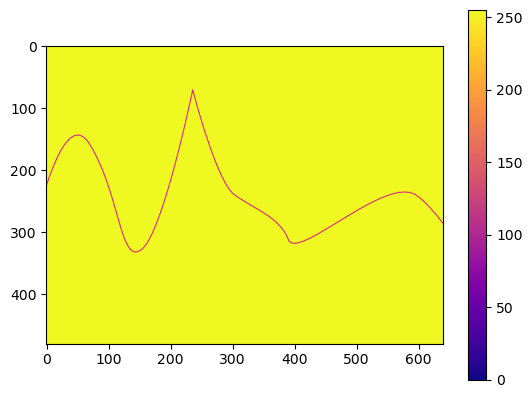

In [34]:
plt.imshow(img, cmap='plasma')
plt.colorbar()

Perfect. The colors have changed because of the colormap that we're using, but that's ok.

Let's now think about how we could find the area under the curve. Maybe we could use a Riemann sum? Let's define a function for a right-handed Riemann sum which also plots a visualization of what's happening:

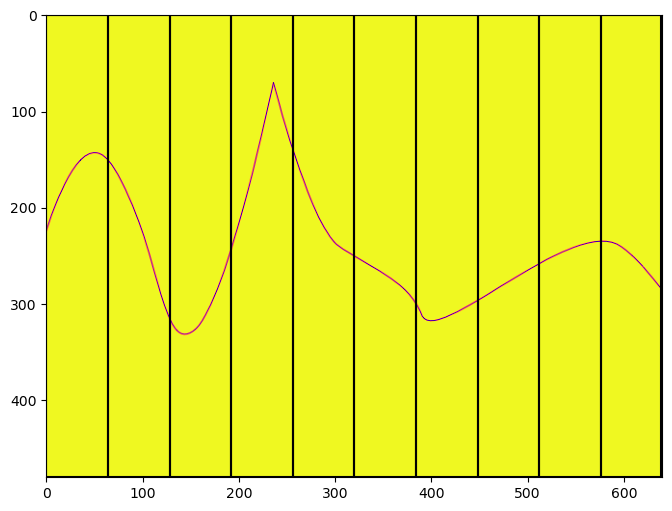

In [35]:
def riemann(img, N):
    """
        Finds the right-handed Riemann sum of an image.
        
        Inputs:
        img: numpy array of the image
        N: integer of the number of intervals
        
        Output:
        Area under the curve
    """
    
    # Grab image dimensions
    im_height, im_width = img.shape
    
    # Display image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap='plasma')
    
    # Find interval length
    interval = int(im_width / N)
    
    # Iterate over intervals
    for i in range(N):
        # Determine horizontal bounds
        hor_start = i * interval
        hor_end   = min(hor_start + interval, im_width - 1)
        
        # Determine vertical bounds
        ver_start = 0
        ver_end   = im_height
        
        # Plot interval
        ax.plot([hor_start, hor_end, hor_end, hor_start, hor_start],
                 [ver_start, ver_start, ver_end, ver_end, ver_start],
                 color='black')
        
    # Set plot bounds
    ax.set_xlim((0, im_width))
    ax.set_ylim((im_height, 0))
    
riemann(img, 10)

Here we've split the image up into 10 segments, but we haven't actually found where these should be bounded vertically.

Redefine the function so that the top-right corner of each interval falls on the curve. Use this information to compute the Riemann sum with `N = 10` intervals and return the area under the curve. Repeat for `N = 320`.

*Hint*: The function [np.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) may be useful.

In [38]:
def riemann(img, N):
    """
        Finds the right-handed Riemann sum of an image.
        
        Inputs:
        img: numpy array of the image
        N: integer of the number of intervals
        
        Output:
        Area under the curve
    """
    
    # Grab image dimensions
    im_height, im_width = img.shape
    
    # Dispaly image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap='plasma')
    
    # Find interval length
    interval = int(im_width / N)
    
    # Iterate over intervals
    for i in range(N):
        # Determine horizontal bounds
        hor_start = i * interval
        hor_end   = min(hor_start + interval, im_width - 1)
        
        # Determine vertical bounds
        ver_start = np.argmin(img[:, hor_end])
        ver_end   = im_height
        
        # Plot interval
        ax.plot([hor_start, hor_end, hor_end, hor_start, hor_start],
                 [ver_start, ver_start, ver_end, ver_end, ver_start],
                 color='black')
        
    # Set plot bounds
    ax.set_xlim((0, im_width))
    ax.set_ylim((im_height, 0))

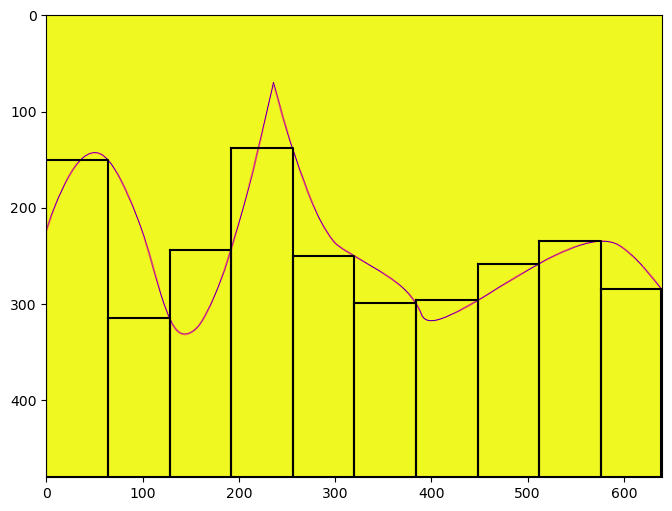

In [39]:
riemann(img, 10)

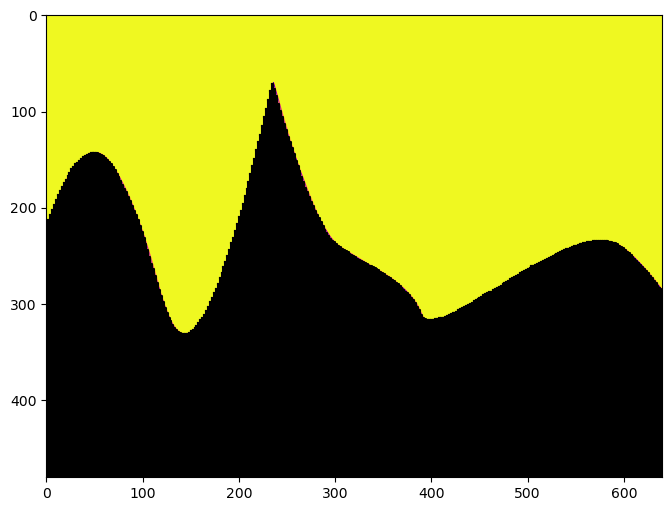

In [40]:
riemann(img, 320)

This method clearly works quite well when we have `N = 320` and each interval has width 2. But what if the image was too big to do this efficiently? Let's instead try a simple Monte Carlo method.

Imagine instead picking `N` random points in the image:

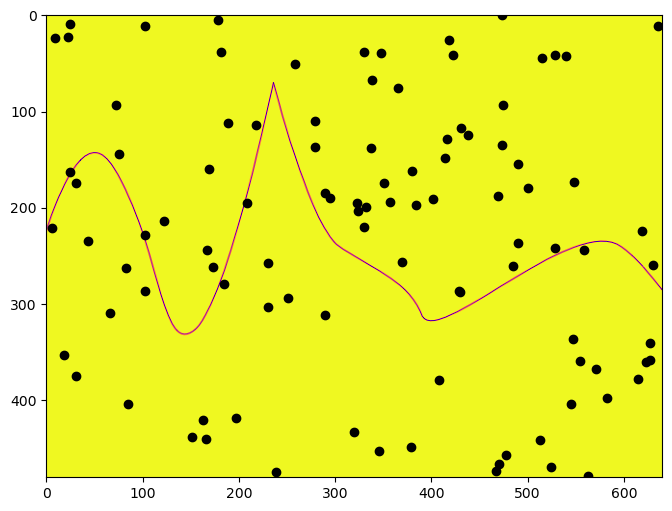

In [41]:
def monte_carlo(img, N):
    """
        Finds the area under a curve in an image using a toy Monte Carlo.
        
        Inputs:
        img: numpy array of the image
        N: number of points to sample
        
        Output:
        Area under the curve
    """
    
    # Grab image dimensions
    im_height, im_width = img.shape
    
    # Dispaly image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap='plasma')
    
    # Sample many points
    for _ in range(N):
        # Pick a random point in the image
        x = int(np.random.uniform(0, im_width))
        y = int(np.random.uniform(0, im_height))
        
        # Plot point
        ax.scatter(x, y, color='black')
        
    # Set plot bounds
    ax.set_xlim((0, im_width))
    ax.set_ylim((im_height, 0))
    
monte_carlo(img, 100)

Redefine the function to determine whether each point lies under the curve. Use this information to compute the area under the curve for `N = 100` and return this value. Repeat for a range of `N` and plot the values. Do your values converge?

In [46]:
from tqdm import tqdm

In [47]:
def monte_carlo(img, N):
    """
        Finds the area under a curve in an image using a toy Monte Carlo.
        
        Inputs:
        img: numpy array of the image
        N: number of points to sample
        
        Output:
        Area under the curve
    """
    
    # Grab image dimensions
    im_height, im_width = img.shape
    
    # Dispaly image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap='plasma')
    
    area = 0

    # Sample many points
    for _ in tqdm(range(N)):
        # Pick a random point in the image
        x = int(np.random.uniform(0, im_width))
        y = int(np.random.uniform(0, im_height))

        area += (y <= np.argmin(img[:, x]))
        
        # Plot point
        ax.scatter(x, y, color='black')
        
    # Set plot bounds
    ax.set_xlim((0, im_width))
    ax.set_ylim((im_height, 0))

    return area / N * im_width * im_height

172032.00000000003

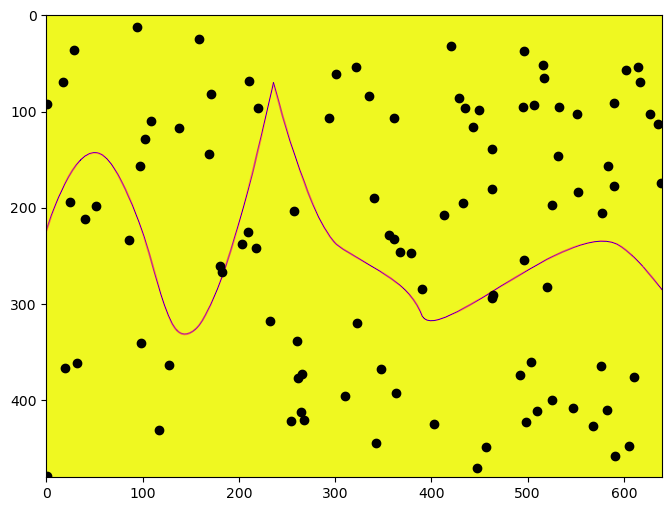

In [43]:
monte_carlo(img, 100)

155750.40000000002

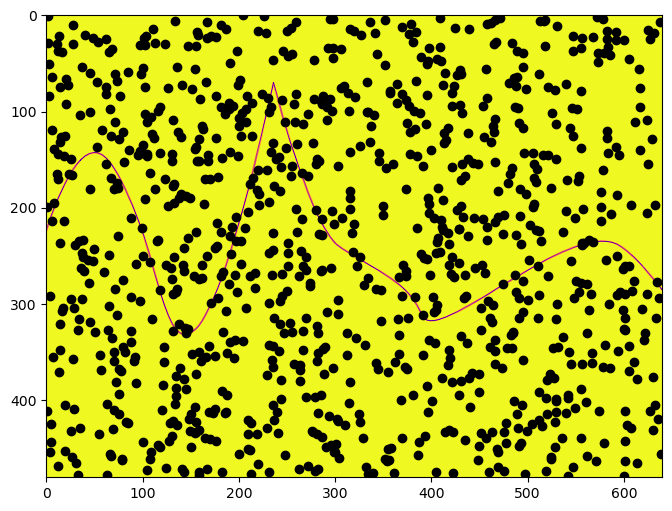

In [44]:
monte_carlo(img, 1000)

100%|██████████| 10000/10000 [02:50<00:00, 58.58it/s]


154122.24000000002

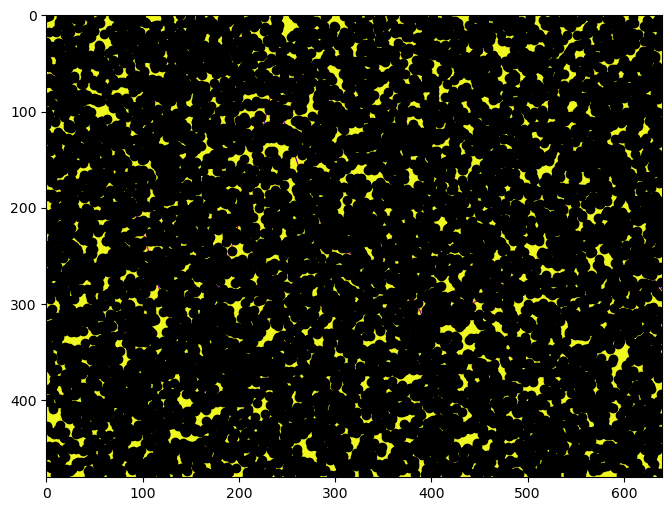

In [48]:
monte_carlo(img, 10000)

# Question 5: 2D Image Data (2 points)

This method works particularly well if your data is high-dimensional, making it difficult to think about Riemann intervals. Let's then take this a step further and consider a 2D shape:

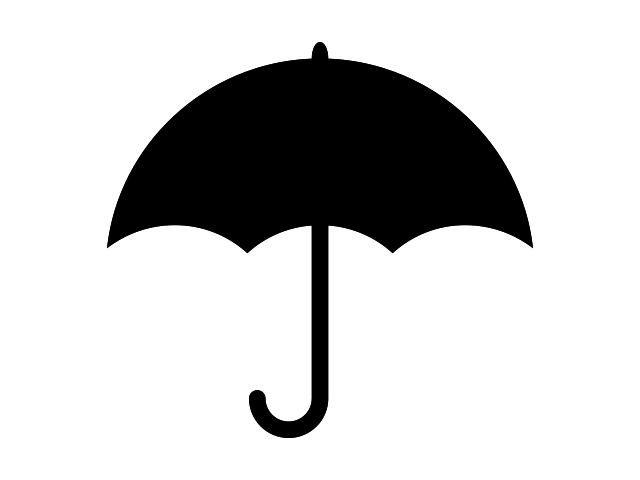

Let's import this image into Python:

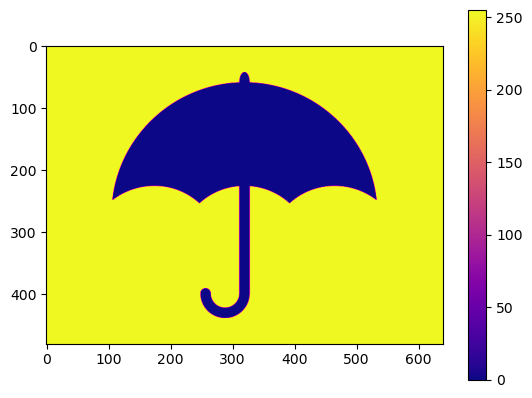

In [49]:
img_2d = cv2.imread('Shape2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_2d, cmap='plasma')
plt.colorbar()

Use a Monte Carlo method to estimate the area of this umbrella. Again, plot your result over a range of values for `N`.

In [52]:
def monte_carlo_2d(img, N, plot=False):
    """
        Finds the area with a 2D curve in an image using a toy Monte Carlo.
        
        Inputs:
        img: numpy array of the image
        N: number of points to sample
        
        Output:
        Area within the curve
    """
    
    # Grab image dimensions
    im_height, im_width = img.shape
    
    # Dispaly image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap='plasma')
    
    area = 0

    # Sample many points
    for _ in tqdm(range(N)):
        # Pick a random point in the image
        x = int(np.random.uniform(0, im_width))
        y = int(np.random.uniform(0, im_height))

        area += img[y, x] / 255
        
        # Plot point
        ax.scatter(x, y, color='black')
        
    # Set plot bounds
    ax.set_xlim((0, im_width))
    ax.set_ylim((im_height, 0))

    return area / N * im_width * im_height

100%|██████████| 100/100 [00:00<00:00, 469.44it/s]


261120.0

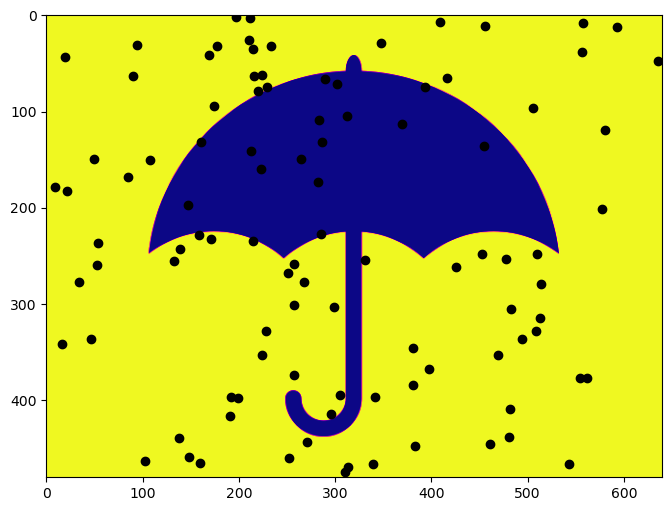

In [53]:
monte_carlo_2d(img_2d, 100)

100%|██████████| 1000/1000 [00:02<00:00, 343.32it/s]


247868.23529411765

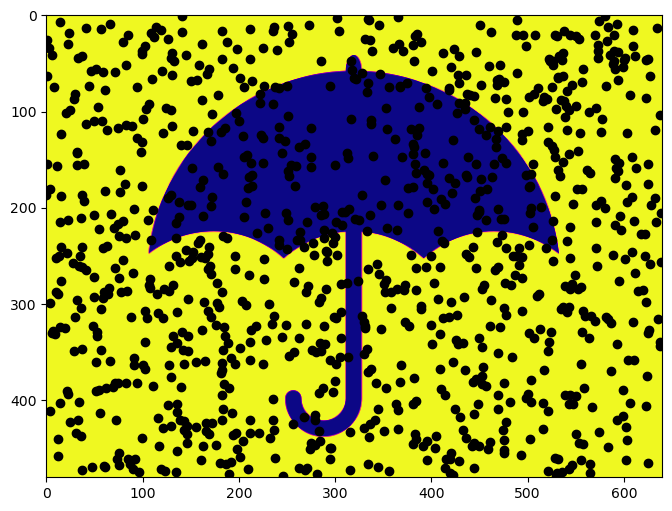

In [54]:
monte_carlo_2d(img_2d, 1000)

100%|██████████| 10000/10000 [02:50<00:00, 58.68it/s]


247521.52094117648

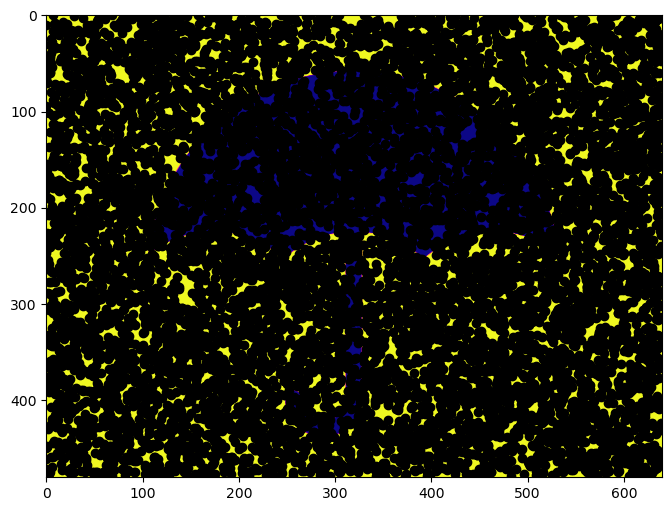

In [55]:
monte_carlo_2d(img_2d, 10000)